In [28]:
import numpy as np
import math

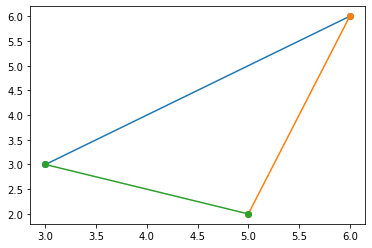

In [9]:
def drawTriangle(a,b,c):
    x1, y1 = [a[0], b[0]], [a[1], b[1]]
    x2, y2 = [b[0], c[0]], [b[1], c[1]]
    x3, y3 = [c[0], a[0]], [c[1], a[1]]
    plt.plot(x1, y1, x2, y2,x3,y3,  marker = 'o')
    plt.show()

drawTriangle([3,3],[6,6],[5,2])

In [74]:

def getVectorAngle(av,bv):
    
    #a*b=|a||b|cost(angle)
    ab    = av[0]*bv[0]+av[1]*bv[1]
    
    MagA  = np.sqrt(av[0]*av[0]+av[1]*av[1])
    MagB  = np.sqrt(bv[0]*bv[0]+bv[1]*bv[1])

    
    angle = ab / (MagA*MagB)
            
    angleInDegree = math.degrees(math.acos(angle))
    
    return angleInDegree


#direction vector between [3,3] -> [6,6] and [3,3]->[5,2]

dv1 = np.array([0,-2])[np.newaxis].T
dv2 = np.array([2,-1])[np.newaxis].T


print (getVectorAngle(dv1,dv2))

    

[0.4472136]
63.43494882292201


### Find is a point is inside a Triangle

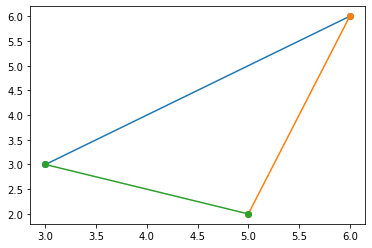

[0.31622777]
[0.21693046]
[0.85749293]
[0.89442719]
[0.85749293]
[0.9701425]
71.56505117707799 77.47119229084849 30.96375653207352
26.565051177077994 30.963756532073536 14.036243467926457
inside


1

In [84]:
def isPointInsideTriangle(p,a,b,c):
    drawTriangle(a,b,c)
    angleABAC = getVectorAngle (np.array(b)[np.newaxis].T- np.array(a)[np.newaxis].T,
                                np.array(c)[np.newaxis].T- np.array(a)[np.newaxis].T
                               )
    angleCACB = getVectorAngle (np.array(a)[np.newaxis].T- np.array(c)[np.newaxis].T,
                                np.array(b)[np.newaxis].T- np.array(c)[np.newaxis].T
                               )
    angleBABC = getVectorAngle (np.array(a)[np.newaxis].T- np.array(b)[np.newaxis].T,
                                np.array(c)[np.newaxis].T- np.array(b)[np.newaxis].T
                               )
        
        
    angleAPAC = getVectorAngle (np.array(p)[np.newaxis].T- np.array(a)[np.newaxis].T,
                                np.array(c)[np.newaxis].T- np.array(a)[np.newaxis].T
                               )
    
    angleCPCB = getVectorAngle (np.array(p)[np.newaxis].T- np.array(c)[np.newaxis].T,
                                np.array(b)[np.newaxis].T- np.array(c)[np.newaxis].T
                               )
    
    angleBPBC = getVectorAngle (np.array(p)[np.newaxis].T- np.array(b)[np.newaxis].T,
                                np.array(c)[np.newaxis].T- np.array(b)[np.newaxis].T
                               )
    
    print (angleABAC,angleCACB,angleBABC)
    
    print (angleAPAC,angleCPCB,angleBPBC)
    
    
    if ((angleAPAC< angleABAC) and 
        (angleCPCB< angleCACB) and
        (angleBPBC< angleBABC)):
        print ("inside")
        return 1
    else:
        print ("outside")
        return 0
    
    
        
    
isPointInsideTriangle([6,3],[3,3],[6,6],[5,2])
    

### Find intersection between two lines

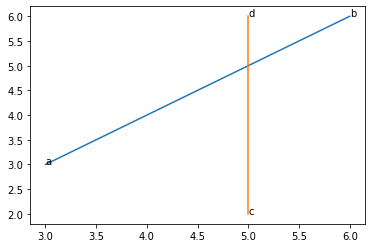

In [119]:
def drawLines(pointspair,points_labels):
   
    for labels,pair in zip (points_labels ,pointspair):
        x_values =[]
        y_values =[]
        
        for label,point in  zip(labels,pair):            
            x_values.append(point[0])
            y_values.append(point[1])
            plt.annotate(label,point)
        #print (x_values,y_values)
        plt.plot(x_values, y_values)
        
        
        
drawLines([([3,3],[6,6]),([5,2],[5,6])], points_labels=[('a','b'),('c','d')])
    

In [107]:
def getVectorCrossProduct(v1,v2):
    return v1[0]*v2[1] - v1[1]*v2[0]


v1 = np.array([3,3])[np.newaxis].T
v2 = np.array([8,6])[np.newaxis].T
print (getVectorCrossProduct(v1,v2))

[-6]


In [120]:
#source 1: https://www.youtube.com/watch?v=WPYTruLFas8
#source 2: https://www.youtube.com/watch?v=c065KoXooSw
def findIntersection(line1,line2):
    a = np.array(line1[0])[np.newaxis].T
    b = np.array(line1[1])[np.newaxis].T
    
    c = np.array(line2[0])[np.newaxis].T
    d = np.array(line2[1])[np.newaxis].T
    
    r = b-a
    s = d-c
    t = getVectorCrossProduct(c-a,s)/ getVectorCrossProduct(r,s)
    
    return_b = a + t*r
    return return_b
print (findIntersection(([3,3],[6,6]), ([5,2],[5,6])))

[[5.]
 [5.]]


### Find shotest distance between a point and line

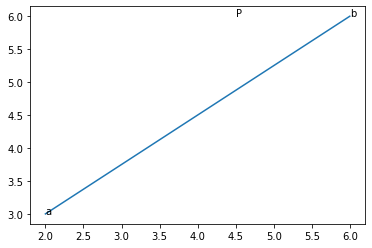

In [141]:
def drawLineAndPoint(pointspair,points_labels,point_todraw):
   
    for labels,pair in zip (points_labels ,pointspair):
        x_values =[]
        y_values =[]
        
        for label,point in  zip(labels,pair):            
            x_values.append(point[0])
            y_values.append(point[1])
            plt.annotate(label,point)
        #print (x_values,y_values)
        plt.plot(x_values, y_values)
        plt.annotate("P",point_todraw)
        
        
        
        
drawLineAndPoint([([2,3],[6,6])],[('a','b')],[4.5,6])

In [134]:
def getDotProduct(v1,v2):
    return v1[0]*v2[0]+v1[1]*v2[1]

In [144]:
#source 1: https://www.youtube.com/watch?v=0lG53-ogF2k&list=PL7F62CA6A7B7C6783&index=3
def findSortestDistance(line,point):
    a = np.array(line[0])[np.newaxis].T
    b = np.array(line[1])[np.newaxis].T
    p = np.array(point)[np.newaxis].T
    
    da = b-a
    k = a-p
    
    
    
    t = - getDotProduct(da,k)/getDotProduct(da,da)
    intersection_vector = a + t*da
    
    return np.sqrt(intersection_vector[0]*intersection_vector[0]+intersection_vector[1]*intersection_vector[1])
    #print (intersection)
    

print (findSortestDistance (([2,3],[6,6]),[4.5,6]))   

[7.29931504]
